### 이상치
- 상식적인 범위를 벗어나는 데이터 값을 뜻하고
- 이상치는 통계적인 방법과 도메인 지식을 이용해서 판단한다.

In [1]:
import pandas as pd # pandas 라이브러리 불러온다

In [4]:
mpg = pd.read_csv("mpg.csv") # csv형식 mpg 파일을 읽는다

In [5]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 이상치를 제거할 때 가장 많이 사용하는 시각화 그래프
- boxplot (상자그림)

In [6]:
import seaborn as sns # searborn 라이브러리 불러온다

<AxesSubplot:ylabel='hwy'>

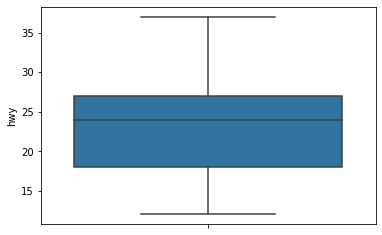

In [73]:
sns.boxplot(data = mpg, y= 'hwy') # hwy에 대한 시각화 그래프

- 상자 아래 세로선, 아랫수염, 하위0%~25% 내에 해당하는 값
- 상자 밑면 2사분위쉬(Q1), 하위 25% 위치 값
- 상자내 굵은 선 2사분위수(Q2), 하위 50% 위치 값(중앙 값)
- 상자 윗면, 3사분위수(Q3), 하위 75%위치 값
- 상자 위 세로선, 윗수염, 하위 75%~100% 위치 값
- 상자 밖 가로선 극단치 경계(이상치 경계) - Q1, Q3밖 1.5IQR내 최대값
- 상자 밖 점 표시 극단치(이상치), Q1, Q3밖 1.5IQR를 벗어난 값

### 1사분위수, 3사분위수 값
- quantile() 분위수를 구할 수 있음
- 1사분위수는 하위 25%, 3사분위수는 하위 75% 값

In [74]:
qut25 = mpg['hwy'].quantile(.25) # 하위 25%

In [75]:
qut75 = mpg['hwy'].quantile(.75) # 하위 75%

### IQR 구하기
- 1사분위수와 3사분위수의 거리를 IQR(Inter Quantile range, 사분위 범위)

In [76]:
iqr = qut75 - qut25 # IQR 구하기 (사분위 범위)

### 상한, 하한 구하는 법
극단치의 경계다 되는 하한, 상한
- 하한: 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값
- 상한: 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값

In [22]:
qut25 - 1.5*iqr # 하한

4.5

In [24]:
qut75 + 1.5*iqr # 상한

40.5

### 극단치를 결측 처리하기!

In [28]:
import numpy as np # numpy 라이브러리 불러온다

In [77]:
mpg['hwy'] = np.where((mpg['hwy']<4.5)|(mpg['hwy']>40.5),np.nan, mpg['hwy']) # 조건에 만족하는 hyw 값

In [78]:
mpg['hwy']

0      29.0
1      29.0
2      31.0
3      30.0
4      26.0
       ... 
229    28.0
230    29.0
231    26.0
232    26.0
233    26.0
Name: hwy, Length: 234, dtype: float64

In [30]:
mpg['hwy'].isna().sum() #이상치가 3개가 나온 것을 확인할 수 있다.

3

In [36]:
##결측치 제거 안하고
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [32]:
# 결측지 제거하고 분석
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 데이터를 추출하는 법
- 판다스에서 제공하는 다양한 메서드를 직접 확인하기!

In [37]:
# 컬럼, 열의 기준으로 데이터를 추출하는 경우는
mpg['manufacturer'] # 컬럼을 기준으로 추출

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [79]:
mpg[['manufacturer', 'drv']] # 2개의 컬럼 추출

,manufacturer,drv
0,audi,f
1,audi,f
2,audi,f
3,audi,f
4,audi,f
...,...,...
229,volkswagen,f
230,volkswagen,f
231,volkswagen,f
232,volkswagen,f


### 행 단위로 데이터를 추출하는 경우!
- loc: 인덱스를 기준으로 행 데이터를 추출
- iloc: 행 번호를 기준으로 데이털를 추출

In [39]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [41]:
# 변수를 대입할 수 있다.
mpg_rows = mpg.shape[0]

In [43]:
mpg_rows_1 = mpg_rows-1
print(mpg_rows_1)

233


In [44]:
mpg.loc[mpg_rows_1]

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [45]:
mpg.loc[[0,4,233,12,41]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26.0,p,midsize
12,audi,a4 quattro,2.8,1999,6,manual(m5),4,17,25.0,p,compact
41,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24.0,r,minivan


### iloc의 속성
- loc은 데이터프레임의 인덱스를 사용하여 데이터를 추출!
- iloc은 데이터의 순서를 의미하는 행 번호를 사용하여 데이터를 추출한다.

In [80]:
print(mpg.loc[233]) # 둘다 같다
print(mpg.iloc[233])

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object
manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object


In [47]:
# iloc 동일하게 loc과 같다.
mpg.iloc[-1]

manufacturer    volkswagen
model               passat
displ                  3.6
year                  2008
cyl                      6
trans             auto(s6)
drv                      f
cty                     17
hwy                   26.0
fl                       p
category           midsize
Name: 233, dtype: object

In [48]:
y = range(10) # 0~9까지의 수

In [49]:
mpg.iloc[[1,2,3,4,5,6,7]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact


In [50]:
mpg.iloc[y]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28.0,p,compact


In [51]:
mpg_new = mpg.loc[[0,2,4,6,8]]

In [52]:
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27.0,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25.0,p,compact


In [81]:
mpg_new.loc[2] # 하나의 행만 보여주므로 데이터프레임x

manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                     20
hwy                   31.0
fl                       p
category           compact
Name: 2, dtype: object

In [54]:
mpg_new.iloc[2]

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                   16
hwy                 26.0
fl                     p
category         compact
Name: 4, dtype: object

In [56]:
mpg_new.iloc[5] # mpg_new의 5번행이 없어서 에러가 뜬다.

IndexError: single positional indexer is out-of-bounds

### loc, iloc 자유자재로 다뤄보기! 

In [58]:
mpg.loc[:, ['model', 'cty']] # 슬라이싱이 가능하다.

,model,cty
0,a4,18
1,a4,21
2,a4,20
3,a4,21
4,a4,16
...,...,...
229,passat,19
230,passat,21
231,passat,16
232,passat,18


In [82]:
mpg.loc[1:100, ['model', 'cty']] #1~100행 & model과 cty 컬럼에 대한 값을 추출한다.

,model,cty
1,a4,21
2,a4,20
3,a4,21
4,a4,16
5,a4,18
...,...,...
96,mustang,15
97,mustang,15
98,mustang,14
99,civic,28


In [60]:
mpg.loc[1:10, [1,2,3]] # loc은 컬럼에 대해서 명칭을 적어줘야 한다.

KeyError: "None of [Int64Index([1, 2, 3], dtype='int64')] are in the [columns]"

In [61]:
mpg.iloc[1:10, [1,2,3]] # 컬렘의 이름뿐만 아니라 컬럼의 순서를 적어도 추출할 수 있따.

,model,displ,year
1,a4,1.8,1999
2,a4,2.0,2008
3,a4,2.0,2008
4,a4,2.8,1999
5,a4,2.8,1999
6,a4,3.1,2008
7,a4 quattro,1.8,1999
8,a4 quattro,1.8,1999
9,a4 quattro,2.0,2008


In [62]:
small_range = list(range(7))

In [63]:
sm_range = list(range(0,10,2))

In [64]:
small_range

[0, 1, 2, 3, 4, 5, 6]

In [65]:
mpg.iloc[:, sm_range]

,manufacturer,displ,cyl,drv,hwy
0,audi,1.8,4,f,29.0
1,audi,1.8,4,f,29.0
2,audi,2.0,4,f,31.0
3,audi,2.0,4,f,30.0
4,audi,2.8,6,f,26.0
...,...,...,...,...,...
229,volkswagen,2.0,4,f,28.0
230,volkswagen,2.0,4,f,29.0
231,volkswagen,2.8,6,f,26.0
232,volkswagen,2.8,6,f,26.0


### 슬라이싱 복습 

In [83]:
mpg.iloc[:, :2] # 전체 행과 0~1열의 값만 추출한다!

,manufacturer,model
0,audi,a4
1,audi,a4
2,audi,a4
3,audi,a4
4,audi,a4
...,...,...
229,volkswagen,passat
230,volkswagen,passat
231,volkswagen,passat
232,volkswagen,passat


In [67]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize


In [68]:
mpg.iloc[:, 0:8:2] # 0~7까지의 컬럼 순서에 2씩 증가를 하니 0,2,4,6에 대한 컬럼 값을 추출하는 것!

,manufacturer,displ,cyl,drv
0,audi,1.8,4,f
1,audi,1.8,4,f
2,audi,2.0,4,f
3,audi,2.0,4,f
4,audi,2.8,6,f
...,...,...,...,...
229,volkswagen,2.0,4,f
230,volkswagen,2.0,4,f
231,volkswagen,2.8,6,f
232,volkswagen,2.8,6,f


In [69]:
mpg.iloc[[1,2,3,4,5],[2,3,4,5]]

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)


In [70]:
mpg.loc[[1,2,3,4,5],['displ','year','cyl','trans']]

,displ,year,cyl,trans
1,1.8,1999,4,manual(m5)
2,2.0,2008,4,manual(m6)
3,2.0,2008,4,auto(av)
4,2.8,1999,6,auto(l5)
5,2.8,1999,6,manual(m5)


### 과제1. mpg 데이터 기준으로 
loc, iloc으로 데이터를 추출하기

슬라이싱, 변수에 넣기 등을 최소 5개 이상씩 진행해 주세요!
### 과제 2. mpg 데이터의 이상치를 다른 컬럼도 다 살펴봐 주세요!
- 이상치를 살펴본 후 IQR을 계산해서 이상치를 제거해 주세요!

In [72]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize
